# Simulation of PGA Tour Golf Data

## Programming for Data Analysis Project 

### Andrew Walker - G00398788@gmit.ie

![www.pgatour.com](https://pga-tour-res.cloudinary.com/image/upload/c_fill,dpr_2.6,f_auto,g_center,h_336,q_auto,w_1320/v1/pgatour/editorial/2020/12/17/Logo/flag-example-1400.jpg)

## 1. Introduction

This project will simulate a data set based on historical PGA Tour golf statistics and model the relationships between four variables:

- Driving distance average (the average number of yards per hole)
- Driving accurary percentage (the percentage of time a tee shot comes to rest in the fairway)
- Greens in Regulation (GIR) percentage (the percent of time a player was able to hit the green in regulation. The GIR stroke is determined by subtracting 2 from par)
- Birdie average (the average number of birdies made per round played.)

The R&A and USGA Distance Insights Report (2020) (https://www.usga.org/content/dam/usga/pdf/2020/distance-insights/DIPR-FINAL-2020-usga.pdf) finds that the average driving distance on the PGA Tour has shown a general increase, in particular from the early 1990s with the introduction of oversized drivers. Following this, further technological and rule innovations has led to a trend in increased distance off the tee.  

However, the Distance Insights Report (2020) also finds that as driving distance increases, driving accuracy decreases.

This project will make a comparison of the above four variables to:

1. Model how driving distance affects accuracy
2. Model how distance and accuracy affect the number of greens in regulation hit
3. Model how distance and accuracy affect the number of birdies scored
4. Model how the number of greens in regulation hit affects birdies

Several initial hypothesis can be made:
    
1. As driving distance increases, the accuracy of the shot decreases leading to more tee shots not landing on the fairway.
2. Hitting GIR will lead to more birdies.

The project will model whether the hypothesis are correct.

The project also will model whether driving distance or accuracy is a more useful indicator to hit GIR and to score birdies - whilst a long drive might be less accurate and find the rough, a shorter approach shot might lead to more GIR  and / or more birdies. Conversely, a more accurate tee shot which finds the fairway but has a longer approach shot might lead to more GIR and / or more birdies.

This might be a useful simulation for golfers to establish if distance could be considered to be more important than accuracy, or vice versa, in the context of reaching in the green in fewer shots and scoring birdies.


The project uses historical data to determine the distribution of random data for modelling. Then, based on the trends in historical data between the years 1990, 2000, 2010, and 2020, predictions are made for likely figures for the four variables in 2030. Random data is then simulated for each variable, using the likely distributions. These variables are then compared to determine whether the hypothesis were correct, and whether driving distance or accuracy is a more useful indicator to hit GIR and to score birdies.

These years were chosen as, according to the Distance Insights Report (2020), there were no major innovations affecting driving distance in the preceeding decades. 

The notebook will detail the steps taken to produce the simulation.



https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

https://www.usga.org/content/dam/usga/pdf/RSI/distance-insights-2021-docs/2020%20Distance%20Report%2026-01-2021.pdf

https://www.usga.org/content/dam/usga/pdf/2020/distance-insights/DIPR-FINAL-2020-usga.pdf

https://www.pgatour.com/stats/stat.101.y2021.html

1990 (no major innovations between 1980 and 1990), 2000, 2010, 2020 - simulate data for 2030

Make a note of total number of players on Fedex

<br>

## 2. Required installations

In order to run the notebook successfully, a number of packages must be installed and initialised. 

This includes the Fitter package. Fitter provides a simple class to identify the distribution from which a data samples is generated from. It uses a number of distributions from the Scipy package and can plot the results to check what is the most probable distrubution for the data. 

To install Fitter:

```pip install fitter```

or on conda:

```conda install fitter```

Further details are available here: https://pypi.org/project/fitter/

In [1]:
# Regular expressions.
#import re

# Convenient HTTP requests.
#import requests as rq

# Dates and times
#import datetime as dt

# Data frames
import pandas as pd

# FOr downloading
#import urllib.request as urlrq

#numpy
import numpy as np

# pyplot
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

import math

#insall fitter 
#https://pypi.org/project/fitter/

from scipy import stats
#https://stackoverflow.com/questions/16330831/most-efficient-way-to-find-mode-in-numpy-array
    
import scipy

rng = np.random.default_rng()

from fitter import get_common_distributions
get_common_distributions()
from fitter import Fitter

import statistics

from scipy.stats import lognorm
from scipy.stats import rayleigh



### Compile stats fop top 100 Fedex Cup rankings

https://www.pgatour.com/content/pgatour/stats/stat.02671.y2021.html

## 3. Collect Main Set of Data

The project uses PGA Tour data from the top 100 ranked golfers at the end of the 2021 Fedex cup (https://www.pgatour.com/). The Fedex cup is a season-long points competition which culminates with the FedExCup Playoffs, a series of three events to determine the FedExCup Champion (https://www.pgatour.com/fedexcup.html).

Data on the top 100 players consisting of Fedex Cup rank, name, and the four variables to be simulated, were saved using a manual process to a .csv file saved in the data folder associated with this project. These data were copied from each players' individual stats page. 

These data are read from the .csv file into a Pandas DataFrame:


In [2]:
rankings = pd.read_csv('data\strokes_gained.csv')

Column titles are added to the DataFrame:

In [3]:
rankings.columns = ['Fedex Rank 2021', 'Name', 'Driving distance (avg yds)','Driving accuracy (%)','Greens In Regulation (%)', 'Birdie average']
#https://note.nkmk.me/en/python-pandas-t-transpose/
rankings

,Fedex Rank 2021,Name,Driving distance (avg yds),Driving accuracy (%),Greens In Regulation (%),Birdie average
0,1,Patrick Cantlay,302.8,60.71,70.16,4.29
1,2,Jon Rahm,309.0,63.73,71.93,4.51
2,3,Kevin Na,288.5,66.56,64.11,4.00
3,4,Justin Thomas,303.9,55.72,67.79,4.31
4,5,Viktor Hovland,302.2,63.86,68.61,4.40
...,...,...,...,...,...,...
95,96,Roger Sloan,295.8,61.78,68.77,3.79
96,97,Brandt Snedeker,286.6,64.04,64.48,3.73
97,98,Hank Lebioda,295.0,61.16,69.14,3.78
98,99,Tyler McCumber,309.4,58.30,64.71,3.57


## 4. Determine Distributions of Data

The next step in the process is to select the individual columns of data for each of the four variables and determine the distribution. 

First, specific column data is selected:

In [4]:
# select specific column data
distance = rankings.iloc[:,2]
accuracy = rankings.iloc[:,3]
gir = rankings.iloc[:,4]
birdies = rankings.iloc[:,5]

Next, the Fitter tool is used to determine the best-fit distribution of each variable, in turn. By default, the fitting process is run on the data with about 80 different distributions. However, this can take a relatively long time for the process to complete. Therefore, to speed the process up, a number of common distributions to check the data against can be specified (https://fitter.readthedocs.io/en/latest/faqs.html#what-are-the-distributions-available). This project uses ten common distributions to check against: 

In [5]:
common_distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

#### Driving Distance Average Distribution

Fitter is run on the driving distance data first and a summary displayed:
(https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)

,sumsquare_error,aic,bic,kl_div
lognorm,0.030668,880.478875,-795.155890,inf
gamma,0.030719,880.085594,-794.989700,inf
chi2,0.030719,880.086111,-794.989433,inf
rayleigh,0.031205,inf,-798.023366,inf
norm,0.031863,876.688442,-795.936826,inf


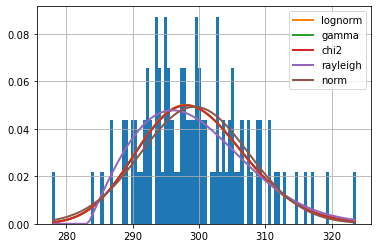

In [6]:
fitdistance = np.array([distance])
f = Fitter(fitdistance, distributions=common_distributions)
f.fit()
f.summary()

<br>

The driving distance average data for the top 100 players in the Fedex cup rankings 2021 is found to be a lognormal distribution. 

The shape, loc, and scale parameters for the above distribution can be displayed using the Fitter tool:

In [7]:
distance_list = f.get_best(method = 'sumsquare_error')
distance_list

{'lognorm': {'s': 0.11093697461805507,
  'loc': 226.62980940729665,
  'scale': 72.26386699032992}}

The code is repeated in a similar manner for the other three variables:

#### Driving Accuracy Average Distribution

,sumsquare_error,aic,bic,kl_div
rayleigh,0.105932,inf,-675.802008,inf
chi2,0.106243,767.803146,-670.904406,inf
gamma,0.107194,765.701837,-670.012613,inf
lognorm,0.107210,765.942683,-669.997928,inf
norm,0.107583,762.150066,-674.255496,inf


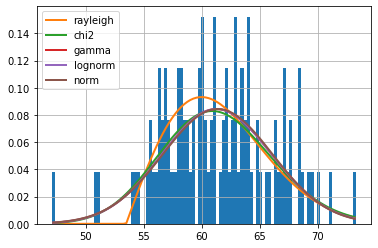

In [8]:
fitaccuracy = np.array([accuracy])
f = Fitter(fitaccuracy, distributions=common_distributions)
f.fit()
f.summary()

In [9]:
accuracy_list = f.get_best(method = 'sumsquare_error')
accuracy_list

{'rayleigh': {'loc': 53.46421743761188, 'scale': 6.506613280990041}}

#### GIR Percentage Distribution

In [10]:
fitgir = np.array([gir])

,sumsquare_error,aic,bic,kl_div
norm,0.991301,543.663959,-452.180353,inf
lognorm,0.991801,545.907262,-447.524837,inf
gamma,0.991862,546.235757,-447.518615,inf
chi2,0.992806,548.067712,-447.423532,inf
rayleigh,1.002078,inf,-451.099131,inf


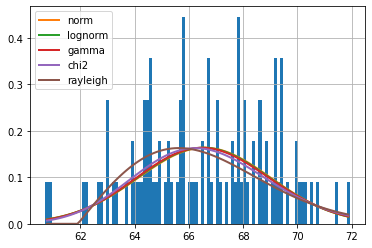

In [11]:
f = Fitter(fitgir, distributions=common_distributions)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [12]:
gir_list = f.get_best(method = 'sumsquare_error')
gir_list


{'norm': {'loc': 66.57350000000001, 'scale': 2.4367405996535614}}

#### Birdie Average Distribution

In [13]:
fitbirdies = np.array([birdies])

,sumsquare_error,aic,bic,kl_div
lognorm,68.248116,122.547073,-24.386525,inf
gamma,68.276475,122.224942,-24.344981,inf
norm,68.380487,119.275421,-28.797927,inf
rayleigh,68.518205,inf,-28.596730,inf
exponpow,69.435081,100.183424,-22.662285,inf


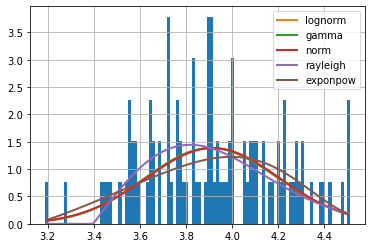

In [14]:
f = Fitter(fitbirdies, distributions=common_distributions)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [15]:
birdies_list = f.get_best(method = 'sumsquare_error')
birdies_list

{'lognorm': {'s': 0.021071276169458617,
  'loc': -9.747395651590328,
  'scale': 13.661062712682266}}

### Summary

As be be seen, for the data set used:

- driving distance average has a lognormal distribution
- driving accuracy average has a Rayleigh distribution
- GIR percentage has as a normal distribution 
- birdie average has a lognormal distribution

## 5. Gather Historical Data for Each Variable

The next stage of the process is to gather historical data for each of the four variables. Data for each of the top 100 players within each variable category was collected from the PGA Tour website for the years 1990, 2000, 2010, and 2020. For example, for driving distance, the top 100 average distances for each of the four years was collected. 

For each variable, the mean for each year is calculated. The increase or decrease between the mean value for each year is then determined - this will show whether PGA Tour golfers, on average, have increased or decreased their statistics each decade. 

Again, this was a manual process which involved copying the data for each variable from the PGA Tour website to a .csv file saved in the data folder associated with this project. 

### Driving Distance Average

In [16]:
historic_distance_df = pd.read_csv('data\historic_distance.csv')

Columns are added with the years as headers:

In [17]:
historic_distance_df.columns = ['1990', '2000', '2010','2020']
historic_distance_df

,1990,2000,2010,2020
0,279.6,301.4,315.5,322.1
1,279.4,298.0,309.8,322.0
2,278.0,288.7,308.5,315.3
3,277.6,288.7,307.3,314.0
4,277.6,288.5,307.2,313.8
...,...,...,...,...
95,263.1,273.3,287.9,297.4
96,263.0,273.2,287.8,297.3
97,263.0,273.2,287.7,297.3
98,263.0,273.2,287.6,297.3


In [18]:
#historic_distance_df_arr = historic_distance_df
#historic_distance_df_arr.columns = ['1990', '2000', '2010','2020']
#https://note.nkmk.me/en/python-pandas-t-transpose/
#historic_distance_df_arr

Each year is separated out:

In [19]:
distance_1990 = historic_distance_df.iloc[:,0]
distance_2000 = historic_distance_df.iloc[:,1]
distance_2010 = historic_distance_df.iloc[:,2]
distance_2020 = historic_distance_df.iloc[:,3]

The mean for each year is determined:

In [20]:
mean_distance_1990 = statistics.mean(distance_1990)
mean_distance_2000 = statistics.mean(distance_2000)
mean_distance_2010 = statistics.mean(distance_2010)
mean_distance_2020 = statistics.mean(distance_2020)

For example:

In [21]:
mean_distance_1990

267.734

The distance increase between years (i.e. each decade) is calculated:

In [22]:
distance_increase = ([mean_distance_2020 - mean_distance_2010],[mean_distance_2010 - mean_distance_2000], [mean_distance_2000 - mean_distance_1990] )
distance_increase

([9.718999999999994], [15.097000000000037], [10.908999999999992])

The mean increase or decrease is calculated:

In [23]:
mean_distance_increase = np.mean(distance_increase)
mean_distance_increase

11.90833333333334

Therefore, on average, each decade from 1990 to 2020, average driving distance on the PGA Tour increased nearly 12 yards. 

In [24]:
#std_distance_increase = np.std(distance_increase)
#std_distance_increase

The process was repeated for the remaining three variables.

### Driving Accuracy Percentage

In [25]:
historic_accuracy_df = pd.read_csv('data\historic_accuracy.csv')

In [26]:
historic_accuracy_df = historic_accuracy_df
historic_accuracy_df.columns = ['1990', '2000', '2010','2020']
historic_accuracy_df

,1990,2000,2010,2020
0,83.67,79.75,76.08,74.50
1,79.19,79.57,75.94,73.86
2,78.97,78.76,74.00,71.84
3,77.84,78.75,73.72,71.36
4,77.57,77.96,72.86,71.29
...,...,...,...,...
95,65.30,68.88,63.72,60.34
96,65.00,68.85,63.69,60.34
97,64.99,68.78,63.47,60.31
98,64.97,68.68,63.40,60.26


In [27]:
accuracy_1990 = historic_accuracy_df.iloc[:,0]
accuracy_2000 = historic_accuracy_df.iloc[:,1]
accuracy_2010 = historic_accuracy_df.iloc[:,2]
accuracy_2020 = historic_accuracy_df.iloc[:,3]

In [28]:
mean_accuracy_1990 = statistics.mean(accuracy_1990)
mean_accuracy_2000 = statistics.mean(accuracy_2000)
mean_accuracy_2010 = statistics.mean(accuracy_2010)
mean_accuracy_2020 = statistics.mean(accuracy_2020)

In [29]:
accuracy_increase = ([mean_accuracy_2020 - mean_accuracy_2010],[mean_accuracy_2010 - mean_accuracy_2000], [mean_accuracy_2000 - mean_accuracy_1990] )

In [30]:
mean_accuracy_increase = np.mean(accuracy_increase)
mean_accuracy_increase

-1.7376000000000005

### GIR Percentage

In [31]:
historic_gir_df = pd.read_csv('data\historic_gir.csv')

In [32]:
historic_gir_df = historic_gir_df
historic_gir_df.columns = ['1990', '2000', '2010','2020']
historic_gir_df

,1990,2000,2010,2020
0,70.91,75.15,72.49,74.22
1,70.85,72.34,71.96,72.54
2,70.22,71.86,71.95,72.10
3,70.06,71.20,71.74,71.70
4,70.00,71.13,71.43,71.69
...,...,...,...,...
95,64.43,65.91,66.86,66.97
96,64.42,65.86,66.81,66.97
97,64.40,65.83,66.78,66.95
98,64.29,65.82,66.77,66.95


In [33]:
gir_1990 = historic_gir_df.iloc[:,0]
gir_2000 = historic_gir_df.iloc[:,1]
gir_2010 = historic_gir_df.iloc[:,2]
gir_2020 = historic_gir_df.iloc[:,3]

In [34]:
mean_gir_1990 = statistics.mean(gir_1990)
mean_gir_2000 = statistics.mean(gir_2000)
mean_gir_2010 = statistics.mean(gir_2010)
mean_gir_2020 = statistics.mean(gir_2020)

In [35]:
gir_increase = ([mean_gir_2020 - mean_gir_2010],[mean_gir_2010 - mean_gir_2000], [mean_gir_2000 - mean_gir_1990] )

In [36]:
mean_gir_increase = np.mean(gir_increase)
mean_gir_increase

0.854000000000004

### Birdie Average

In [37]:
historic_birdies_df = pd.read_csv('data\historic_birdies.csv')

In [38]:
historic_birdies_df = historic_birdies_df
historic_birdies_df.columns = ['1990', '2000', '2010','2020']
historic_birdies_df

,1990,2000,2010,2020
0,3.88,4.92,4.06,4.67
1,3.84,4.26,4.03,4.55
2,3.82,4.22,4.02,4.55
3,3.76,4.21,4.01,4.42
4,3.76,4.08,4.00,4.38
...,...,...,...,...
187,2.61,2.88,2.95,3.20
188,2.59,2.80,2.88,3.20
189,2.58,2.77,2.82,3.18
190,2.29,2.76,2.80,3.04


In [39]:
birdies_1990 = historic_birdies_df.iloc[:,0]
birdies_2000 = historic_birdies_df.iloc[:,1]
birdies_2010 = historic_birdies_df.iloc[:,2]
birdies_2020 = historic_birdies_df.iloc[:,3]

In [40]:
mean_birdies_1990 = statistics.mean(birdies_1990)
mean_birdies_2000 = statistics.mean(birdies_2000)
mean_birdies_2010 = statistics.mean(birdies_2010)
mean_birdies_2020 = statistics.mean(birdies_2020)

In [41]:
birdies_increase = ([mean_birdies_2020 - mean_birdies_2010],[mean_birdies_2010 - mean_birdies_2000], [mean_birdies_2000 - mean_birdies_1990] )

In [42]:
mean_birdies_increase = np.mean(birdies_increase)
mean_birdies_increase 

0.20939236111111104

### Summary

On average, each decade from 1990 to 2020:

- average driving distance on the PGA Tour increased by approximately 12 yards. 

- average driving accuracy on the PGA Tour decreased by approximately 1.7

- GIR percentage on the PGA Tour increased by approximately 0.85

- birdie average on the PGA Tour increased by approximately 0.2 



## 6. Estimate Variables for 2030

Based on the average increase or decrease for each decade determined in the last section, an estimate is made for the values of each variable in 2030 (i.e. in another decade from 2020).

### Driving Distance Average

In [43]:
mean_distance_2030 = (mean_distance_2020 + mean_distance_increase)
mean_distance_2030

315.36733333333336

### Driving Accuracy Percentage

In [44]:
mean_accuracy_2030 = (mean_accuracy_2020 + mean_accuracy_increase)
mean_accuracy_2030

62.5958

### GIR Percentage

In [45]:
mean_gir_2030 = (mean_gir_2020 + mean_gir_increase)
mean_gir_2030

69.8079

### Birdie Average

In [46]:
mean_birdies_2030 = (mean_birdies_2020 + mean_birdies_increase)
mean_birdies_2030

3.9966840277777775

### Summary

The estimated value for each variable for 2030 is:

- average driving distance is approximately 315.4 yards 

- average driving accuracy is approximately 62.6%

- GIR percentage is approximately 69.8%

- birdie average is approximately 4%




## 7. Simulate Distribution for Each Variable using 2030 Estimated Values

The next step in the project is to simulate the distribution for each variable using the 2030 estimated values. There are various ways to do this in Python, such as using the Numpy package. For this project, it was decided to use the SciPy package. SciPy provides algorithms for algebraic equations, differential equations, statistics and many other classes of problems (https://scipy.org/). In particular, the ```scipy.stats``` module will be used which contains a large number of probability distributions, statistical tests, kernel density estimation and more (https://docs.scipy.org/doc/scipy/reference/stats.html).

### Driving Distance Average

As detailed in Section 4, the Fitter tool provided the s, loc, and scale values (as required) for each of the distributions for each of the variables for the top 100 ranked players in the 2021 Fedex cup. 

For the driving distance distribution (as shown in Section 4) these are as follow:

In [47]:
distance_list

{'lognorm': {'s': 0.11093697461805507,
  'loc': 226.62980940729665,
  'scale': 72.26386699032992}}

The same values are used for the s, loc, and scale values for the 2030 simulated distribution. However, for loc, the mean distance increase determined in Section 6 was added to the loc value as the distance has increased. 

In [48]:
s=0.11093697461805507
distance_loc=(226.62980940729665+mean_distance_increase)
distance_scale=72.26386699032992

A simulated distribution for the driving distance average for 2030 can then be created using the lognormal distribution function in SciPy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm):

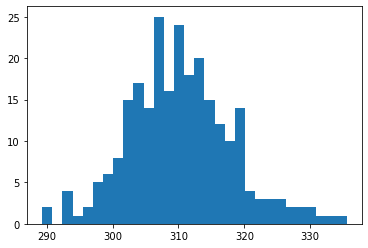

In [49]:
distance_2030 = lognorm.rvs(s, loc=distance_loc, scale=distance_scale, size=250)
plt.hist(distance_2030, bins=30)

plt.show()

The maximum, minimum, and mean values can be shown:

In [50]:
distance_2030.max(), distance_2030.min(), distance_2030.mean()

(335.5078572476658, 289.30853278005407, 310.33197700891225)

### Driving Accuracy Percentage

A similar process is used for driving accuracy. As previosly determined, a Rayleigh distribution (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html) will be used and the loc and scale values were determined by Fitter:

In [51]:
accuracy_list

{'rayleigh': {'loc': 53.46421743761188, 'scale': 6.506613280990041}}

In [52]:
accuracy_loc=(53.46421743761188+mean_accuracy_increase)
accuracy_scale=6.506613280990041

Please note, the average accuracy decreased and so the loc value is lower than previously determined. 

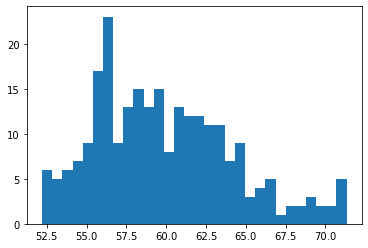

In [53]:
accuracy_2030 = rayleigh.rvs(loc=accuracy_loc, scale=accuracy_scale, size=250, random_state=None) 
plt.hist(accuracy_2030, bins=30)

plt.show()

The maximum, minimum, and mean values can be shown:

In [54]:
accuracy_2030.max(), accuracy_2030.min(), accuracy_2030.mean()

(71.32237011968692, 52.205173003313206, 59.84911644709022)

### GIR Percentage

In [55]:
accuracy_loc

51.72661743761188

### Birdie Average

In [56]:
std_accuracy_increase = np.std(accuracy_increase)

In [57]:
mean_accuracy_2030 = (mean_accuracy_2020 + mean_accuracy_increase)
mean_accuracy_2030

62.5958

https://www.kite.com/python/answers/how-to-convert-a-dictionary-to-a-numpy-array-in-python 
use this to put the scale factor in
#accuray_list_data = list(accuracy_list.items())
#accuray_list_array = np.array(accuray_list_data)
#accuray_list_array


### GIR

In [58]:
std_gir_increase = np.std(gir_increase)

In [59]:
mean_gir_2030 = (mean_gir_2020 + mean_gir_increase)
mean_gir_2030

69.8079

In [60]:
from scipy.stats import norm

In [61]:
gir_list

{'norm': {'loc': 66.57350000000001, 'scale': 2.4367405996535614}}

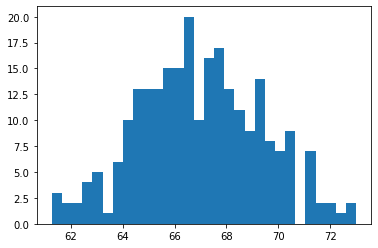

In [62]:
gir_2030 = norm.rvs(loc=67.154, scale=2.4367405996535614, size=250, random_state=None) # use the mean value determined for the loc and the scale is determined using fitter
plt.hist(gir_2030, bins=30)

plt.show()

### Birdies

In [63]:
std_birdies_increase = np.std(birdies_increase)

In [64]:
mean_birdies_2030 = (mean_birdies_2020 + mean_birdies_increase)
mean_birdies_2030

3.9966840277777775

In [65]:
birdies_list

{'lognorm': {'s': 0.021071276169458617,
  'loc': -9.747395651590328,
  'scale': 13.661062712682266}}

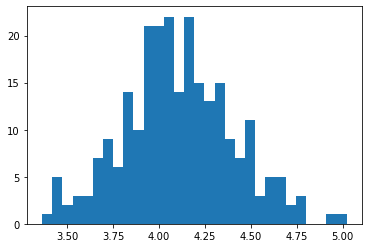

In [66]:
s=0.021071276169458617
birdies_2030 = lognorm.rvs(s, loc=-9.5384, scale=13.661062712682266, size=250) # use the mean value determined for the loc and the scale is determined using fitter
plt.hist(birdies_2030, bins=30)

plt.show()


In [67]:
df_distance_2030 = pd.DataFrame(distance_2030)
df_accuracy_2030 = pd.DataFrame(accuracy_2030)
df_gir_2030 = pd.DataFrame(gir_2030)
df_birdies_2030 = pd.DataFrame(birdies_2030)

In [68]:
total_2030 = pd.concat([df_distance_2030, df_accuracy_2030, df_gir_2030, df_birdies_2030], axis=1) #https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [69]:
total_2030.columns = ['Driving distance (yds)', 'Driving accuracy (%)', 'GIR (%)', 'Birdie average (%)']
print(total_2030)

     Driving distance (yds)  Driving accuracy (%)    GIR (%)  \
0                333.174589             57.128914  69.093207   
1                321.509014             56.450721  67.920828   
2                315.199586             62.473116  71.390565   
3                312.647145             61.767694  65.943135   
4                318.088959             54.273422  65.953803   
..                      ...                   ...        ...   
245              293.796936             56.338940  67.405243   
246              311.522832             59.608551  63.843265   
247              316.386887             57.435083  67.943741   
248              319.204485             54.928698  67.774955   
249              307.085298             63.264695  62.235709   

     Birdie average (%)  
0              3.970860  
1              4.322051  
2              4.254971  
3              4.656365  
4              4.418832  
..                  ...  
245            4.258343  
246            4.021061

In [70]:
total_2030_t = total_2030.T
print(total_2030_t)
#https://note.nkmk.me/en/python-pandas-t-transpose/

                               0           1           2           3    \
Driving distance (yds)  333.174589  321.509014  315.199586  312.647145   
Driving accuracy (%)     57.128914   56.450721   62.473116   61.767694   
GIR (%)                  69.093207   67.920828   71.390565   65.943135   
Birdie average (%)        3.970860    4.322051    4.254971    4.656365   

                               4           5           6           7    \
Driving distance (yds)  318.088959  309.249164  303.464758  301.958038   
Driving accuracy (%)     54.273422   56.138947   59.602276   55.217813   
GIR (%)                  65.953803   62.465236   68.106670   67.247392   
Birdie average (%)        4.418832    4.500090    3.777692    4.452404   

                               8           9    ...         240         241  \
Driving distance (yds)  301.583878  309.981190  ...  312.941252  308.924524   
Driving accuracy (%)     59.408210   62.379718  ...   64.416704   54.112799   
GIR (%)              

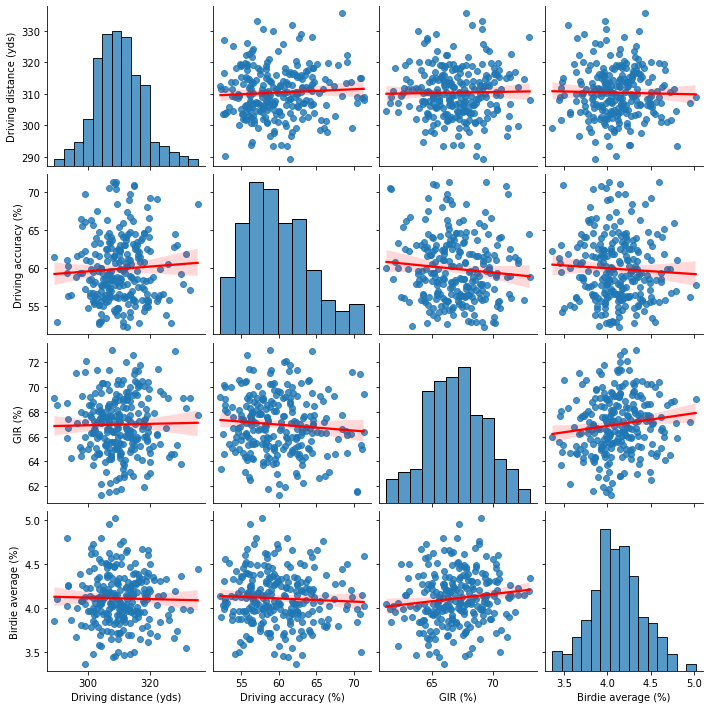

In [71]:
sns.pairplot(total_2030, kind="reg", plot_kws={'line_kws':{'color':'red'}})
# https://stackoverflow.com/questions/50722972/change-the-regression-line-colour-of-seaborns-pairplot

## Learnings

- manual process (could have automated to collect data - expressions 
- more years provide more data
- more players
- more years distributions
- scale factors and loc might not be correct